In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
import ipaddress

In [ ]:
def make_bytes_plot(df) -> plt.figure:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
    range_for_ip_bytes = range(0, 100000, 10000)
    range_for_bytes = range(0, 100, 100)
    ax1.set_xticks(range_for_ip_bytes)
    ax1.set_yticks(range_for_ip_bytes)
    ax3.set_xticks(range_for_ip_bytes)
    ax3.set_yticks(range_for_ip_bytes)
    ax2.set_yticks(range_for_bytes)
    ax2.set_xticks(range(0, 100, 10))
    ax4.set_yticks(range_for_bytes)
    ax4.set_xticks(range(0, 100, 10))
    sns.scatterplot(data=df, x='orig_ip_bytes', y='resp_ip_bytes', hue='label', ax=ax1)
    sns.scatterplot(data=df, x='orig_ip_bytes', y='resp_ip_bytes', hue='proto', ax=ax3)
    sns.scatterplot(data=df, x='orig_bytes', y='resp_bytes', hue='label', ax=ax2)
    sns.scatterplot(data=df, x='orig_bytes', y='resp_bytes', hue='proto', ax=ax4)
    return fig

In [ ]:
def make_port_plot(df):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.scatterplot(data=df, x='orig_p', y='resp_p', hue='label', ax=ax1)
    sns.scatterplot(data=df, x='orig_p', y='resp_p', hue='proto', ax=ax2)
    return fig

In [ ]:
nRowsRead = None # specify 'None' if want to read whole file

fields=["ts","uid","orig_h","orig_p","resp_h","resp_p","proto","service","duration","orig_bytes","resp_bytes","conn_state","local_orig","local_resp","missed_bytes","history","orig_pkts","orig_ip_bytes","resp_pkts","resp_ip_bytes","tunnel_parents","label","detailed-label"]
df1 = pd.read_csv('https://mcfp.felk.cvut.cz/publicDatasets/IoTDatasets/CTU-IoT-Malware-Capture-1-1/bro/conn.log.labeled',skipfooter=1, engine="python",names=fields, sep="\x09|\x20\x20\x20", skiprows=8, nrows = nRowsRead)
df1.dataframeName = 'CTU-IoT-Malware-Capture-1-1'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

df1.dtypes

There are 1008748 rows and 23 columns


ts                float64
uid                object
orig_h             object
orig_p              int64
resp_h             object
resp_p              int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
local_resp         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
label              object
detailed-label     object
dtype: object

In [ ]:
def to_ipaddress(params):
    ips:int = []
    for i in params:
        ips.append(int(ipaddress.IPv4Address(i)))
        
    return ips

In [ ]:
def to_float(params):
    ips = []
    for i in params:
        value = None
        try: 
            value = float(i)
        except:
            value = None
        ips.append(value)
    return ips

In [ ]:
def to_int(params):
    ips = []
    for i in params:
        value = None
        try: 
            value = int(i)
        except:
            value = None
        ips.append(value)
    return ips


In [ ]:
df1['ts'] = pd.to_datetime(df1['ts'], unit='s')
df1['orig_h'] = to_ipaddress(df1['orig_h'])

df1['resp_h'] = to_ipaddress(df1['resp_h'])
df1['orig_bytes'] = to_int(df1['orig_bytes'])
df1['resp_bytes'] = to_int(df1['resp_bytes'])

df1['duration'] = to_float(df1['duration'])

df1['local_orig'] = df1['local_orig'].astype(bool)
df1['local_resp'] = df1['local_resp'].astype(bool)

df1['tunnel_parents'] = df1['tunnel_parents'].astype(str)


# One hot for porto

# Get one hot encoding of columns porto
one_hot = pd.get_dummies(df1['proto'])
# Drop column B as it is now encoded
df1 = df1.drop('proto',axis = 1)
# Join the encoded df
df1 = df1.join(one_hot)


In [ ]:
df1.dtypes


ts                datetime64[ns]
uid                       object
orig_h                     int64
orig_p                     int64
resp_h                     int64
resp_p                     int64
service                   object
duration                 float64
orig_bytes               float64
resp_bytes               float64
conn_state                object
local_orig                  bool
local_resp                  bool
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
label                     object
detailed-label            object
icmp                       uint8
tcp                        uint8
udp                        uint8
dtype: object

In [ ]:
#make_bytes_plot(df1)
#plt.show()


In [ ]:

pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500) 
df1.head(5)

,ts,uid,orig_h,orig_p,resp_h,resp_p,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label,icmp,tcp,udp
0,2018-05-09 15:30:31.015811072,CUmrqr4svHuSXJy5z7,3232261223,51524,1098901923,23,-,2.999051,0.0,0.0,S0,True,True,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan,0,1,0
1,2018-05-09 15:30:31.025054976,CH98aB3s1kJeq6SFOc,3232261223,56305,1066799275,23,-,NaN,NaN,NaN,S0,True,True,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan,0,1,0
2,2018-05-09 15:30:31.045044992,C3GBTkINvXNjVGtN5,3232261223,41101,1864898353,23,-,NaN,NaN,NaN,S0,True,True,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan,0,1,0
3,2018-05-09 15:30:32.016239872,CDe43c1PtgynajGI6,3232261223,60905,2209273747,23,-,2.998796,0.0,0.0,S0,True,True,0,S,3,180,0,0,(empty),Malicious,PartOfAHorizontalPortScan,0,1,0
4,2018-05-09 15:30:32.024985088,CJaDcG3MZzvf1YVYI4,3232261223,44301,1529491263,23,-,NaN,NaN,NaN,S0,True,True,0,S,1,60,0,0,(empty),Malicious,PartOfAHorizontalPortScan,0,1,0


In [ ]:
# check for missing values
df1.isna().sum()

ts                     0
uid                    0
orig_h                 0
orig_p                 0
resp_h                 0
resp_p                 0
service                0
duration          796300
orig_bytes        796300
resp_bytes        796300
conn_state             0
local_orig             0
local_resp             0
missed_bytes           0
history                0
orig_pkts              0
orig_ip_bytes          0
resp_pkts              0
resp_ip_bytes          0
tunnel_parents         0
label                  0
detailed-label         0
icmp                   0
tcp                    0
udp                    0
dtype: int64

In [ ]:
df1["label"].value_counts()

Malicious    539473
Benign       469275
Name: label, dtype: int64

In [ ]:
x = df1.loc[:, ['resp_p', 'orig_p']].values

# 'resp_h','resp_p', 'icmp', 'tcp', 'udp', 'local_orig', 'local_resp' ,'orig_pkts', 'orig_ip_bytes', 'resp_pkts' ,'resp_ip_bytes'

In [ ]:
print(x.shape)

(1008748, 2)


In [ ]:
# https://www.section.io/engineering-education/dbscan-clustering-in-python/

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

In [ ]:
print(len(distances))

1008748


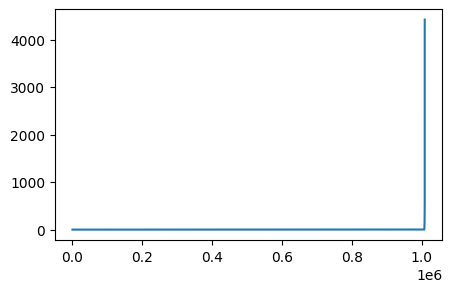

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

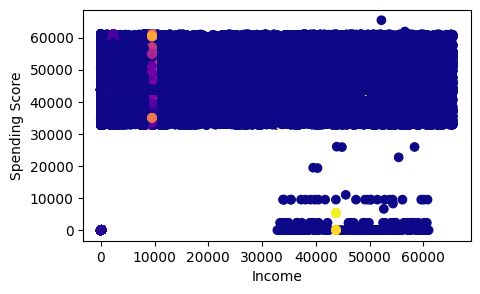

In [ ]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot